In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Binance import BinanceClient as client
import risk_kit as rk
import crypto_portfolio as cp
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
bc = client.instance()

### crypto historical data analysis

In [ ]:
# tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT']
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT']
cp.historical_tradedata_analysis(tradepairs, '30 day ago', interval='1h',
                                 period_info={'name':'Daily', 'intervals':24})

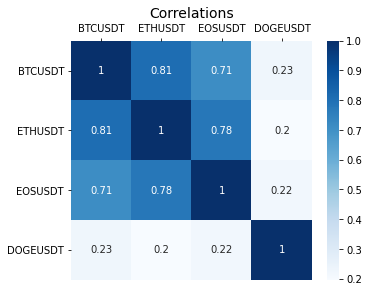

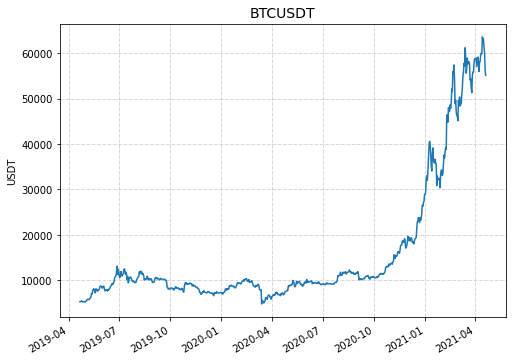

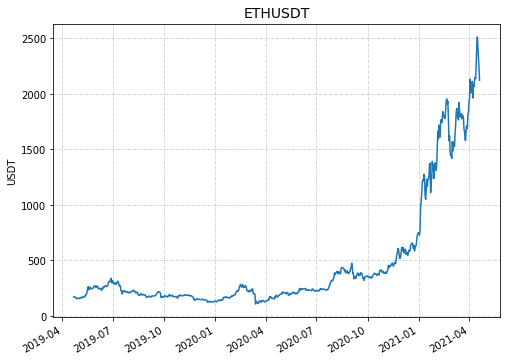

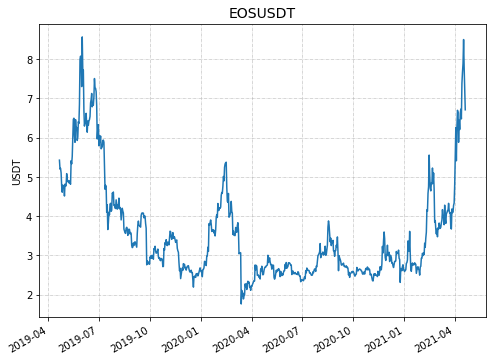

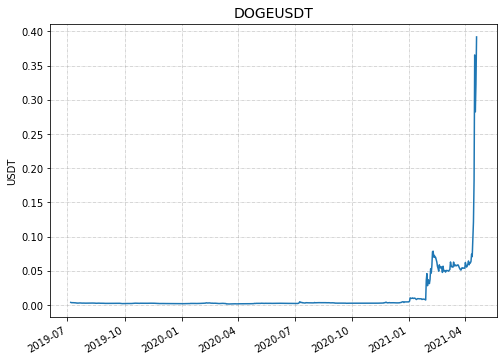

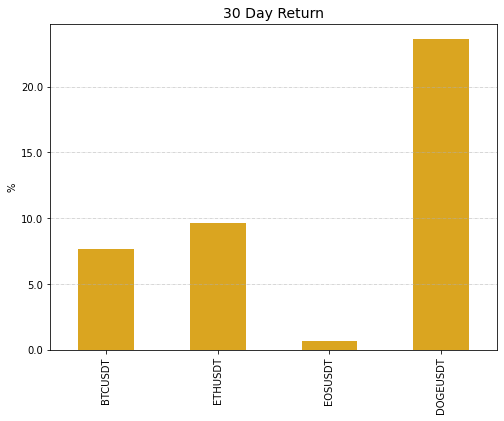

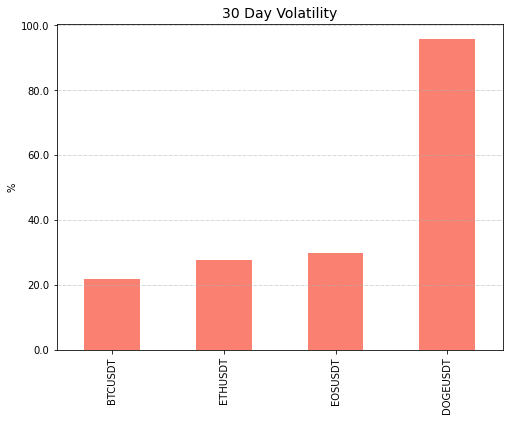

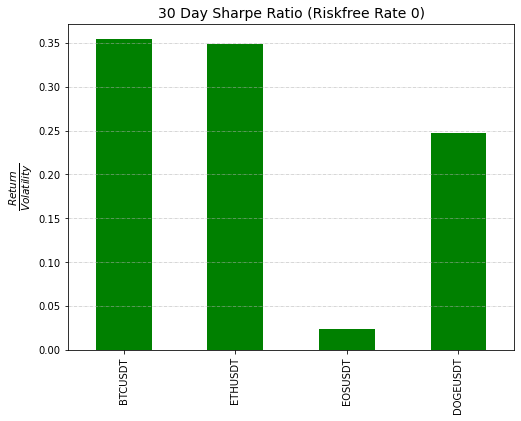

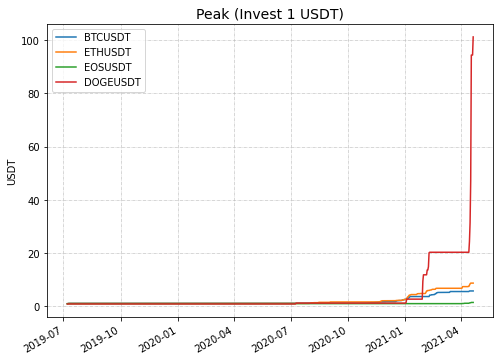

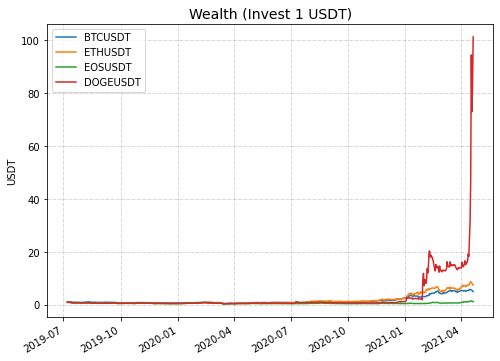

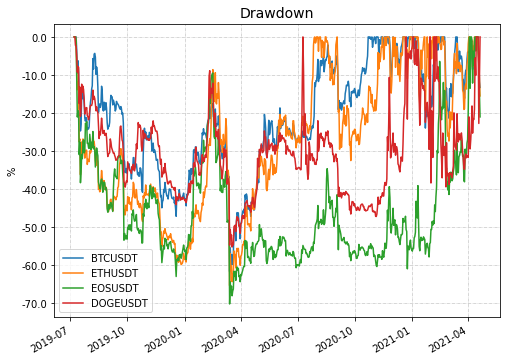

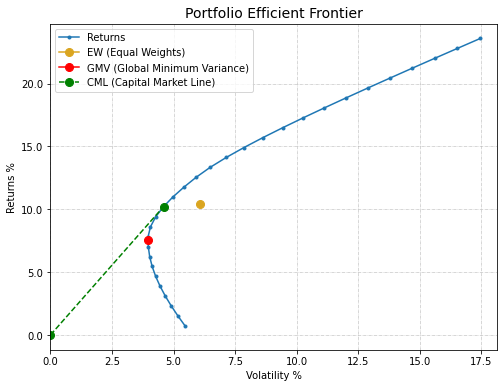

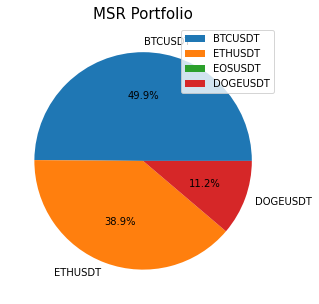

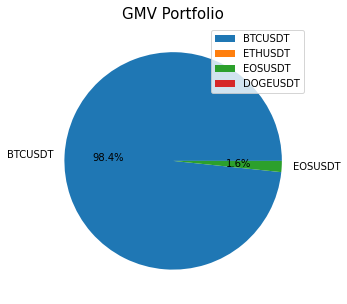

In [4]:
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT']
cp.historical_tradedata_analysis(tradepairs, '2 year ago', interval='1d',
                                 period_info={'name':'30 Day', 'intervals':30})

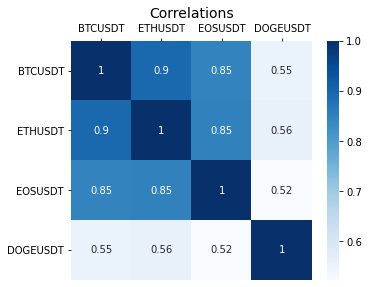

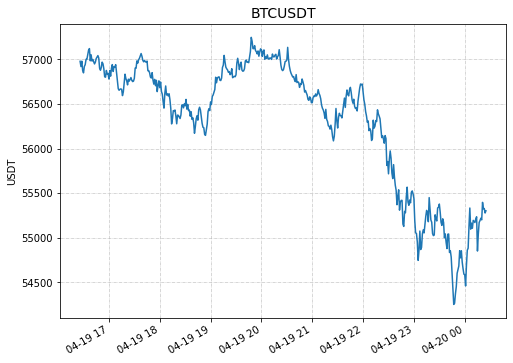

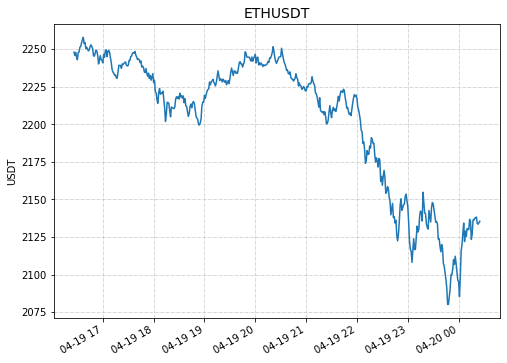

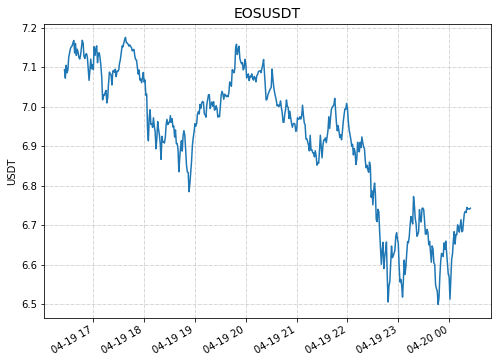

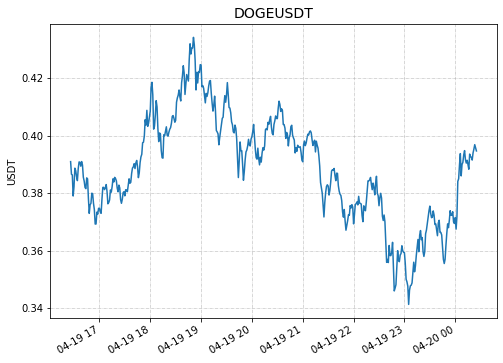

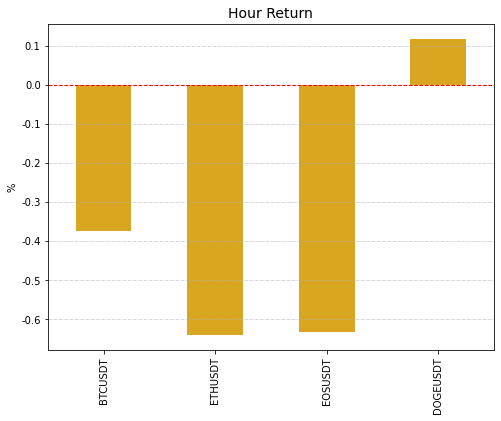

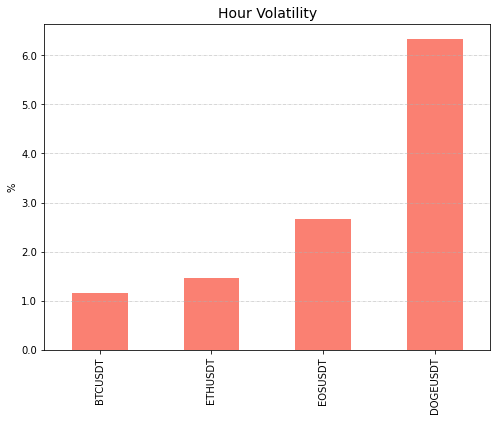

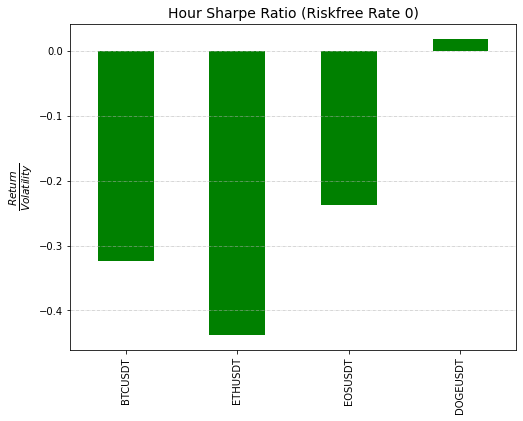

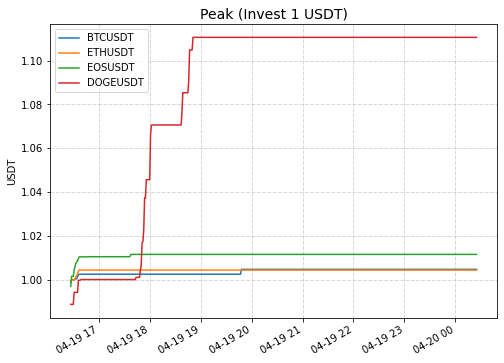

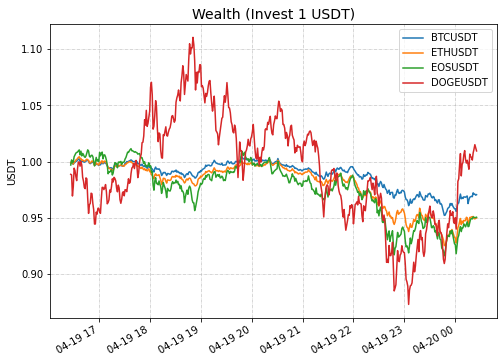

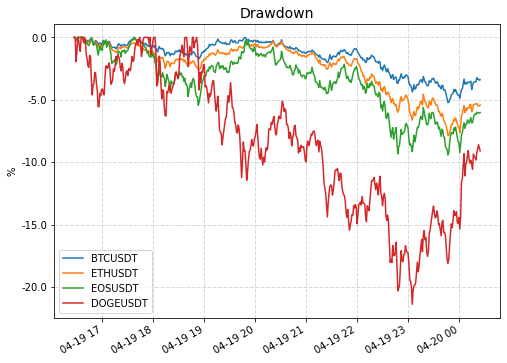

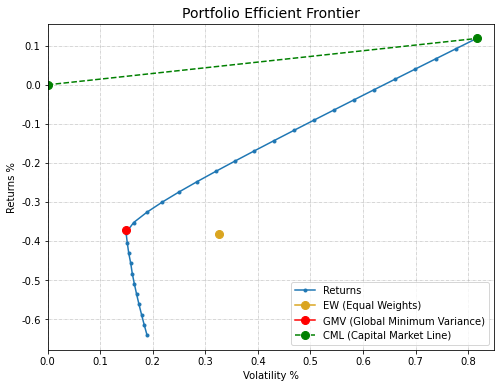

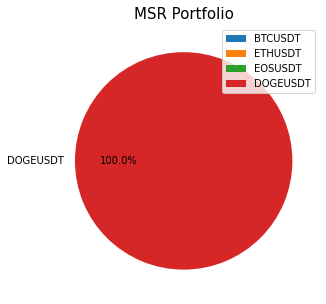

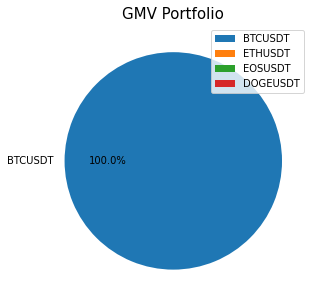

In [3]:
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT']
cp.historical_tradedata_analysis(tradepairs, '8 hour ago', interval='1m',
                                 period_info={'name':'Hour', 'intervals':60})

In [ ]:
btcusdt = bc.get_klines_pd('BTCUSDT')
ethusdt = bc.get_klines_pd('ETHUSDT')
eosusdt = bc.get_klines_pd('EOSUSDT')
bnbusdt = bc.get_klines_pd('BNBUSDT')

crypto = pd.DataFrame(
    {
        'BTC': btcusdt['Close'],
        'ETH': ethusdt['Close'],
        'EOS': eosusdt['Close'],
        'BNB': bnbusdt['Close'],
    },
    index=eosusdt.index
)
crypto.tail()

In [ ]:
btc_week = bc.get_historical_klines_pd('BTCUSDT', '1 week ago', interval='1h')
eth_week = bc.get_historical_klines_pd('ETHUSDT', '1 week ago', interval='1h')
eos_week = bc.get_historical_klines_pd('EOSUSDT', '1 week ago', interval='1h')

crypto_week = pd.DataFrame(
    {
        'BTC': btc_week['Close'],
        'ETH': eth_week['Close'],
        'EOS': eos_week['Close'],
    },
    index=eos_week.index
)
crypto_week.tail()

In [ ]:
# tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT']
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT']
cp.historical_tradedata_analysis(tradepairs, '30 day ago', period_info={'name':'Daily', 'intervals':24})

In [ ]:
tradedata_pd = cp.historical_tradedata_pd(tradepairs, '7 day ago', interval='1h')
# - return series, covariance
rets = tradedata_pd.pct_change().dropna()
cov = rets.cov()
periodized_ret = rk.periodized_ret(rets, 24)
periodized_vol = rk.periodized_vol(rets, 24)

In [ ]:
rk.msr(periodized_ret, cov)

In [ ]:
a = rk.gmv(cov)
# a = np.array([0.7, 0.2, 0.1, 0])
a100 = a * 100
b = (a100 > 1e-8) * a100
pdd = pd.DataFrame([b], columns = tradepairs)
pdd = pd.DataFrame({'portfolio': b}, index=tradepairs)
print(pdd)
ax = pdd.plot.pie(y='portfolio', figsize=(5, 5),
                  autopct=lambda v: '{:.1f}%'.format(v) if v > 0 else '')
plt.title('Portfolio', fontsize=15)
ax.set_ylabel('')

In [ ]:
cr_week = crypto_week.pct_change()
cr_week = cr_week.dropna()
cr_week.index = cr_week.index.to_period('S')
cr_week.head()
cov = cr_week.cov()
daily_ret = rk.periodized_ret(cr_week, 24) # daily (24 hours)
daily_vol = rk.periodized_vol(cr_week, 24)

### Drawdown calculation

In [ ]:
dd = rk.drawdown(cr_week, return_dict=True)
dd['Peaks'].plot(title='Peak', ylabel='%', figsize=(16, 8))
dd['Wealth'].plot(title='Wealth', ylabel='%', figsize=(16, 8))
dd['Drawdown'].plot(title='Drawdown', ylabel='%', figsize=(16, 8))
plt.show()

In [ ]:
l = ['BTC', 'ETH']
daily_ret.plot.bar(title='Daily Return', color='goldenrod')
plt.show()
daily_vol.plot.bar(title='Daily Volatility', color='green')
plt.show()
# rk.plot_ef2(20, daily_ret[l], cov.loc[l,l])
rk.plot_ef(20, er, cov, show_cml=True, show_ew=True, show_gmv=True)
plt.title('Portfolio')
plt.show()

In [ ]:
print(daily_ret)
weights = rk.msr(daily_ret, cov)
weights = np.round(weights * 100, decimals=2)
weights = pd.DataFrame([weights], columns=cr_week.columns)
# weights = weights.style.hide_index()
weights

### learn datetime 

In [ ]:
dt = pd.to_datetime('2021-04-16 12:00:00').tz_localize('Asia/Shanghai').tz_convert('UTC')
dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
bc.get_historical_klines_pd('BTCUSDT', '2021-04-16 12:00:00', '2021-04-16 13:00:00')

In [ ]:
# bc.get_historical_klines_pd('BTCUSDT', '2021-04-16 12:00:00', interval='1h')
bc.get_historical_klines_pd('BTCUSDT', '1 hour ago', interval='1m')

In [ ]:
aa = aa.index.to_period('S').tz
aa

In [ ]:
import dateparser as dp
# from datetime import timezone
import pytz

In [ ]:
dp.parse('1 min ago').astimezone(timezone.utc).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
tt = dp.parse('2021-04-18 14:42:49').astimezone(pytz.utc).strftime('%Y-%m-%d %H:%M:%S')
tt

In [ ]:
atime = dp.parse('2021-04-18 14:42:49').astimezone(pytz.utc)
atime.tzinfo

In [ ]:
btime = atime.replace(tzinfo=pytz.timezone('Asia/Shanghai'))
print(btime)

In [ ]:
ctime = dp.parse('1 min ago').astimezone(pytz.timezone('Asia/Shanghai'))
# ctime.astimezone(pytz.utc)
ctime.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
dtime = dp.parse('1 min ago utc')
dtime = dp.parse('2021-04-18 14:42:49')
# dtime = dtime.replace(tzinfo=pytz.timezone('Asia/Shanghai'))
# dtime = dtime.replace(tzinfo=pytz.utc)
# dtime = dtime.astimezone(pytz.timezone('Asia/Shanghai'))
dtime = dtime.astimezone(pytz.utc)
dtime.strftime('%Y-%m-%d %H:%M:%S')
# dtime.tzinfo

In [ ]:
# crypto = pd.concat([eosusdt.index, eosusdt['Close'], btcusdt['Close']],
#                     axis=1)


In [ ]:
pd.concat([crypto.mean(), crypto.median(), crypto.mean()>crypto.median()], axis='columns')

In [ ]:
rk.skewness(crypto)

In [ ]:
norm.skew(crypto)

In [ ]:
rk.kurtosis(crypto)

In [ ]:
norm.kurtosis(crypto)

In [ ]:
norm.jarque_bera(crypto)

In [ ]:
rk.is_normal(crypto['EOS'])

In [ ]:
rk.semideviation(crypto)

In [ ]:
crypto.std(ddof=0)

In [ ]:
crypto['EOS'][crypto['EOS']>0].std(ddof=0)

In [ ]:
rk.var_historic(crypto)

In [ ]:
crypto['BTC'].plot()

In [ ]:
np.percentile(crypto, 5, axis=0)

In [ ]:
import scipy.stats
scipy.stats.norm.ppf(0.05)

In [ ]:
rk.var_historic(crypto)

In [ ]:
rk.var_gaussian(crypto)

In [ ]:
rk.var_gaussian(crypto,True)

In [ ]:
var_list = [rk.var_gaussian(crypto),
            rk.var_gaussian(crypto, modified=True),
            rk.var_historic(crypto)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gaussian', 'Gornish-Fisher', 'Historic']
comparison.loc[['EOS']].plot.bar(title='var')
comparison.plot.bar()

In [ ]:
crypto['BTC'].plot()

In [ ]:
rk.cvar_historic(crypto)